In [150]:
import matplotlib.pyplot as plt
import pandas as pd
import pathlib
from scipy.ndimage import gaussian_filter1d
from scipy.stats import linregress

### Load data

In [149]:
# Load the data from CSV files
parent = pathlib.Path().resolve()

sc_background_raw = pd.read_csv(parent/'data'/'sc_background.csv')
sc_background = [sc_background_raw['x0000'].values, sc_background_raw['y0000'].values]

sc_06dbm_raw = pd.read_csv(parent/'data'/'sc_06dbm.csv')
sc_06dbm = [sc_06dbm_raw['x0000'].values, sc_06dbm_raw['y0000'].values]

sc_08dbm_raw = pd.read_csv(parent/'data'/'sc_08dbm.csv')
sc_08dbm = [sc_08dbm_raw['x0000'].values, sc_08dbm_raw['y0000'].values]

sc_10dbm_raw = pd.read_csv(parent/'data'/'sc_10dbm.csv')
sc_10dbm = [sc_10dbm_raw['x0000'].values, sc_10dbm_raw['y0000'].values]

sc_12dbm_raw = pd.read_csv(parent/'data'/'sc_12dbm.csv')
sc_12dbm = [sc_12dbm_raw['x0000'].values, sc_12dbm_raw['y0000'].values]

sc_14dbm_raw = pd.read_csv(parent/'data'/'sc_14dbm.csv')
sc_14dbm = [sc_14dbm_raw['x0000'].values, sc_14dbm_raw['y0000'].values]

sc_16dbm_raw = pd.read_csv(parent/'data'/'sc_16dbm.csv')
sc_16dbm = [sc_16dbm_raw['x0000'].values, sc_16dbm_raw['y0000'].values]

# Check if the measured frequencies are the same for all datasets
check = True
for i in range(0, len(sc_06dbm[0])):
    if sc_06dbm[0][i] != sc_16dbm[0][i] or sc_06dbm[0][i] != sc_14dbm[0][i] or sc_06dbm[0][i] != sc_12dbm[0][i] \
        or sc_06dbm[0][i] != sc_10dbm[0][i] or sc_06dbm[0][i] != sc_08dbm[0][i] or sc_06dbm[0][i] != sc_background[0][i]:
        check = False
        print("break")
        break
print("Frequencies are the same:", check)

Frequencies are the same: True


### Analysis of data with moving point average with a Gaussian kernel

In [ ]:
# Perform moving point average with a Gaussian kernel
def fwhm_to_sigma(fwhm, dx):
    """Convert FWHM to sigma for a Gaussian kernel."""
    return fwhm / (2 * np.sqrt(2 * np.log(2))) / dx

# Calculate dx (frequency step) from x axis (assuming all x axes are the same)
x = sc_06dbm[0]
dx = x[1] - x[0]

fwhm_hz = 1.5e6  # 1.5 MHz
sigma = fwhm_to_sigma(fwhm_hz, dx)

# Apply Gaussian filter to all y data
sc_background_avg = [sc_background[0], gaussian_filter1d(sc_background[1], sigma)]
sc_06dbm_avg = [sc_06dbm[0], gaussian_filter1d(sc_06dbm[1], sigma)]
sc_08dbm_avg = [sc_08dbm[0], gaussian_filter1d(sc_08dbm[1], sigma)]
sc_10dbm_avg = [sc_10dbm[0], gaussian_filter1d(sc_10dbm[1], sigma)]
sc_12dbm_avg = [sc_12dbm[0], gaussian_filter1d(sc_12dbm[1], sigma)]
sc_14dbm_avg = [sc_14dbm[0], gaussian_filter1d(sc_14dbm[1], sigma)]
sc_16dbm_avg = [sc_16dbm[0], gaussian_filter1d(sc_16dbm[1], sigma)]


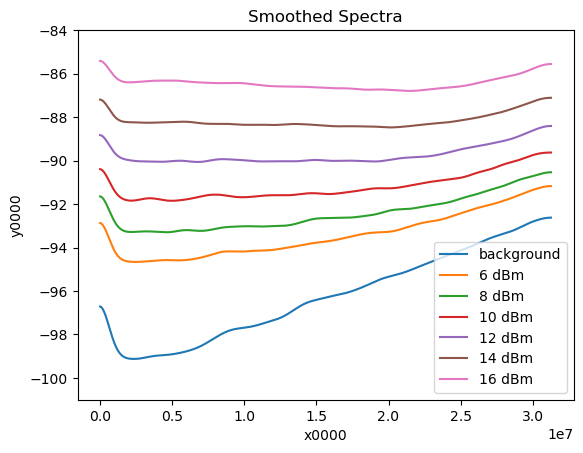

In [ ]:
# Plot the smoothed spectra
plt.plot(sc_background_avg[0][100:], sc_background_avg[1][100:], linewidth=1.5)
plt.plot(sc_06dbm_avg[0][100:], sc_06dbm_avg[1][100:], linewidth=1.5)
plt.plot(sc_08dbm_avg[0][100:], sc_08dbm_avg[1][100:], linewidth=1.5)
plt.plot(sc_10dbm_avg[0][100:], sc_10dbm_avg[1][100:], linewidth=1.5)
plt.plot(sc_12dbm_avg[0][100:], sc_12dbm_avg[1][100:], linewidth=1.5)
plt.plot(sc_14dbm_avg[0][100:], sc_14dbm_avg[1][100:], linewidth=1.5)
plt.plot(sc_16dbm_avg[0][100:], sc_16dbm_avg[1][100:], linewidth=1.5)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD')
plt.ylim(-101, -84)
plt.title('Smoothed Spectra')
plt.legend(['background', '6 dBm', '8 dBm', '10 dBm', '12 dBm', '14 dBm', '16 dBm'])
plt.show()

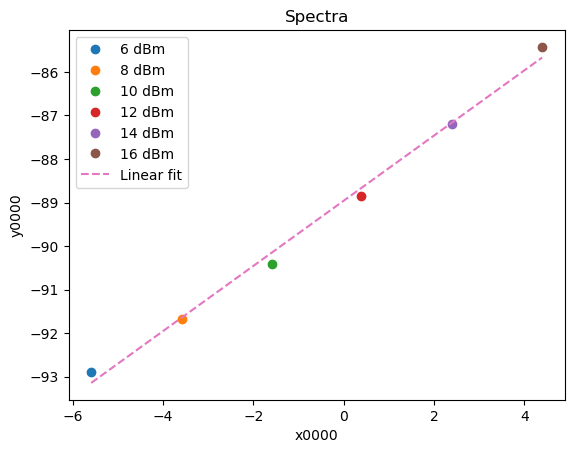

Slope: 0.748418607583084, Intercept: -88.95759369007317, R-squared: 0.9942849479427737, P-value: 1.2271590802483186e-05, Std Err: 0.028370647244538836


In [ ]:
# Plot the PSD for different dBm values at specific frequency at index N
N = 400 # Set index i.e. choose frequency

# x values for the fit (the dBm values)
x_fit = np.array([-5.59, -3.59, -1.59, 0.39, 2.39, 4.39])

# y values for the fit (the measured y values at index N)
y_fit = np.array([
    sc_06dbm_avg[1][N],
    sc_08dbm_avg[1][N],
    sc_10dbm_avg[1][N],
    sc_12dbm_avg[1][N],
    sc_14dbm_avg[1][N],
    sc_16dbm_avg[1][N]
])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_fit, y_fit)

# Plot the points
plt.plot(-5.59, sc_06dbm_avg[1][N], 'o', label='6 dBm')
plt.plot(-3.59, sc_08dbm_avg[1][N], 'o', label='8 dBm')
plt.plot(-1.59, sc_10dbm_avg[1][N], 'o', label='10 dBm')
plt.plot(0.39, sc_12dbm_avg[1][N], 'o', label='12 dBm')
plt.plot(2.39, sc_14dbm_avg[1][N], 'o', label='14 dBm')
plt.plot(4.39, sc_16dbm_avg[1][N], 'o', label='16 dBm')

# Plot the linear fit (shift x values to match plotted x positions)
plt.plot(x_fit, slope * x_fit + intercept, '--', label='Linear fit')
plt.legend()
plt.xlabel('Frequency (Mhz)')
plt.ylabel('PSD (V)')
plt.title('Spectra')
plt.show()

print(f"Slope: {slope}, Intercept: {intercept}, R-squared: {r_value**2}, P-value: {p_value}, Std Err: {std_err}")

### Analysis of unprocessed data

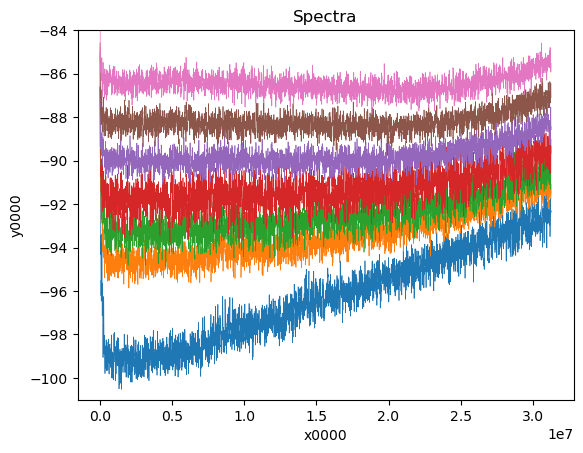

In [ ]:
# Plot the unprocessed data for comparison
plt.plot(sc_background[0][100:], sc_background[1][100:], linewidth=0.5)
plt.plot(sc_06dbm[0][100:], sc_06dbm[1][100:], linewidth=0.5)
plt.plot(sc_08dbm[0][100:], sc_08dbm[1][100:], linewidth=0.5)
plt.plot(sc_10dbm[0][100:], sc_10dbm[1][100:], linewidth=0.5)
plt.plot(sc_12dbm[0][100:], sc_12dbm[1][100:], linewidth=0.5)
plt.plot(sc_14dbm[0][100:], sc_14dbm[1][100:], linewidth=0.5)
plt.plot(sc_16dbm[0][100:], sc_16dbm[1][100:], linewidth=0.5)
#plt.legend(['background', '6 dBm', '8 dBm', '10 dBm', '12 dBm', '14 dBm', '16 dBm'])
plt.xlabel('x0000')
plt.ylabel('y0000')
plt.ylim(-101,-84)

plt.title('Spectra')
plt.show()


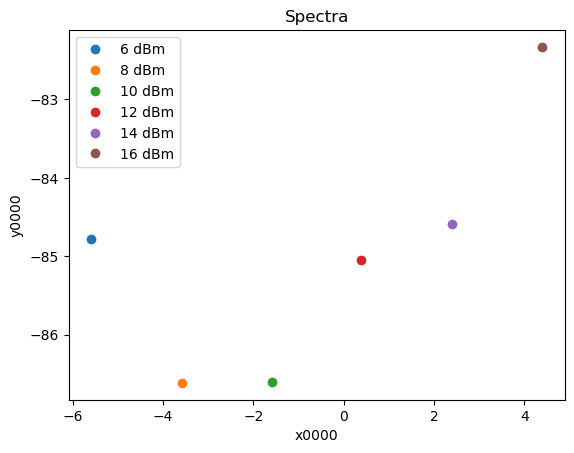

In [ ]:
# Plot the PSD for different dBm values at specific frequency at index N
N = 100
plt.plot(-5.59, sc_06dbm[1][N], 'o', label='6 dBm')
plt.plot(-3.59, sc_08dbm[1][N], 'o', label='8 dBm')
plt.plot(-1.59, sc_10dbm[1][N], 'o', label='10 dBm')
plt.plot(0.39, sc_12dbm[1][N], 'o', label='12 dBm')
plt.plot(2.39, sc_14dbm[1][N], 'o', label='14 dBm')
plt.plot(4.39, sc_16dbm[1][N], 'o', label='16 dBm')
plt.legend()
#plt.legend(['background', '6 dBm', '8 dBm', '10 dBm', '12 dBm', '14 dBm', '16 dBm'])
plt.xlabel('x0000')
plt.ylabel('y0000')
plt.title('Spectra')
plt.show()